In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [9]:
#Load dataset
churn = pd.read_excel("Churn.xlsx")
churn.drop("TotalCharges", axis=1, inplace = True) #changer ca. yavai un pb avec les string

> Impact of tenure on Churn:

In [10]:
tenure = churn[["tenure","Churn"]].copy()
tenure.Churn[tenure.Churn == 1] = "Yes"
tenure.Churn[tenure.Churn == 0] = "No"

In [11]:
tenure1 = tenure[tenure.tenure <= 6]
tenure2 = tenure[np.logical_and(tenure.tenure > 6,tenure.tenure <= 20)]
tenure3 = tenure[np.logical_and(tenure.tenure > 20,tenure.tenure <= 40)]
tenure4 = tenure[np.logical_and(tenure.tenure > 40,tenure.tenure <= 60)]
tenure5 = tenure[tenure.tenure > 60]

(array([1314.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          93.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1 Patch objects>)

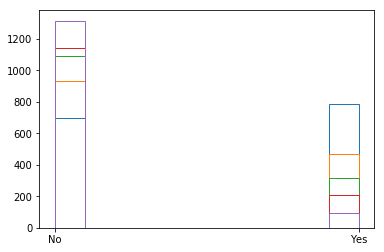

In [12]:
plt.hist(tenure1.Churn, histtype="step")
plt.hist(tenure2.Churn, histtype="step")
plt.hist(tenure3.Churn, histtype="step")
plt.hist(tenure4.Churn, histtype="step")
plt.hist(tenure5.Churn, histtype="step")

We see that customers who have been customers for shorter periods are more likely to leave.
This histogram not readable, make better.

> Machine learning:

In [13]:
train = churn.iloc[0:6000].drop("customerID", axis=1)
test =  churn.iloc[6001:7000].drop("customerID", axis=1)

In [23]:
classifier = RandomForestClassifier()
classifier.fit(train.drop("Churn", axis=1), train.Churn)

predicted_churn = classifier.predict(test.drop("Churn", axis=1))

In [29]:
matched = predicted_churn == test.Churn

(array([217.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 782.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

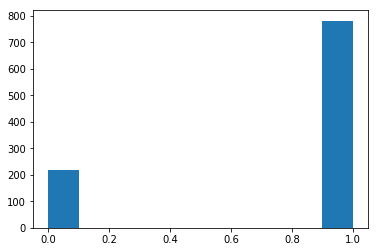

In [31]:
plt.hist(matched)

Using all the features available, we see we can predict 80% of churn with this model of random forest

> See what features matter the most